https://github.com/anthropics/anthropic-cookbook

ANTHROPIC_API_KEY

In [ ]:
!pip install anthropic

In [2]:
from dotenv import load_dotenv
load_dotenv()

True

In [27]:
import anthropic

client = anthropic.Anthropic()
MODEL = "claude-3-haiku-20240307"
# MODEL = "claude-3-5-sonnet-20240620"

In [26]:

message = client.messages.create(
    model=MODEL,
    max_tokens=1000,
    temperature=0,
    system="You are a world-class poet. Respond only with short poems.",
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": "Why is the ocean salty?"
                }
            ]
        }
    ]
)
print(message.content) # [TextBlock(text="Waves crash and foam,\nEarth's tears flow free,\nEons of minerals\nDissolve in the sea.\n\nSalt from the land,\nCarried by streams,\nAccumulates where\nThe blue ocean gleams.", type='text')]

[TextBlock(text="Waves crash and foam,\nEarth's tears flow free,\nEons of minerals\nDissolve in the sea.\n\nSalt from the land,\nCarried by streams,\nAccumulates where\nThe blue ocean gleams.", type='text')]


# Vision
- resizing images before uploading if they exceed size or token limits
- very small images under 200 pixels on any given edge may degrade performance
- For non-resized: `tokens = (width px * height px)/750`
- JPEG, PNG, GIF, or WebP

Max
- Aspect ratio	Image size
- 1:1	1092x1092 px
- 3:4	951x1268 px
- 2:3	896x1344 px
- 9:16	819x1456 px
- 1:2	784x1568 px


https://docs.anthropic.com/en/docs/build-with-claude/vision

In [7]:
import base64
import httpx

# France map
image1_url = "https://upload.wikimedia.org/wikipedia/commons/c/cf/France_and_its_region.png"
image1_media_type = "image/png"
image1_data = base64.b64encode(httpx.get(image1_url).content).decode("utf-8")

# France Eiffel Tower
image2_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/1/19/Eiffel_Tower_at_Night.jpg/440px-Eiffel_Tower_at_Night.jpg"
image2_media_type = "image/jpeg"
image2_data = base64.b64encode(httpx.get(image2_url).content).decode("utf-8")

# GB
image3_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/c/c8/MODIS_-_Great_Britain_-_2012-06-04_during_heat_wave_%28cropped%29.jpg/520px-MODIS_-_Great_Britain_-_2012-06-04_during_heat_wave_%28cropped%29.jpg"
image3_media_type = "image/png"
image3_data = base64.b64encode(httpx.get(image1_url).content).decode("utf-8")

# GB Big Ben
image4_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/4/43/Elizabeth_Tower%2C_June_2022.jpg/500px-Elizabeth_Tower%2C_June_2022.jpg"
image4_media_type = "image/jpeg"
image4_data = base64.b64encode(httpx.get(image2_url).content).decode("utf-8")

In [19]:
message = client.messages.create(
    model="claude-3-5-sonnet-20240620",
    max_tokens=1024,
    system="Respond only in Spanish.",
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": "Image 1:"
                },
                {
                    "type": "image",
                    "source": {
                        "type": "base64",
                        "media_type": image1_media_type,
                        "data": image1_data,
                    },
                },
                {
                    "type": "text",
                    "text": "Image 2:"
                },
                {
                    "type": "image",
                    "source": {
                        "type": "base64",
                        "media_type": image2_media_type,
                        "data": image2_data,
                    },
                },
                {
                    "type": "text",
                    "text": "How are these images related?"
                }
            ],
        }
    ],
)
# Message(id='msg_01BDHzojCkTcpwQyFNLUpLDd', content=[TextBlock(text='Estas dos imágenes están estrechamente relacionadas ya que ambas se centran en Francia y su capital, París.\n\nLa primera imagen muestra un mapa de Europa occidental, con Francia resaltada en rojo. París, la capital francesa, está marcada con una estrella amarilla en el centro del país.\n\nLa segunda imagen muestra la Torre Eiffel, el monumento más emblemático de París y uno de los símbolos más reconocibles de Francia en todo el mundo. La Torre Eiffel se encuentra en el corazón de París, la misma ciudad que está marcada en el mapa de la primera imagen.\n\nJuntas, estas imágenes representan a Francia tanto geográficamente como a través de uno de sus monumentos más famosos. El mapa proporciona contexto sobre la ubicación de Francia en Europa, mientras que la Torre Eiffel simboliza la rica historia y cultura del país, así como su atractivo turístico.\n\nEn resumen, ambas imágenes se complementan para ofrecer una representación visual de Francia, destacando su posición geográfica y uno de sus lugares más icónicos.', type='text')], model='claude-3-5-sonnet-20240620', role='assistant', stop_reason='end_turn', stop_sequence=None, type='message', usage=Usage(input_tokens=2542, output_tokens=263))

In [29]:
with open("data/flower.png", "rb") as image_file:
    binary_data = image_file.read()
    base_64_data = base64.b64encode(binary_data).decode('utf-8')

message_list = [
    {
        "role": 'user',
        "content": [
            {"type": "image", "source": {"type": "base64", "media_type": "image/png", "data": base_64_data}},
            {"type": "text", "text": "Write a sonnet based on this image."}
        ]
    }
]

response = client.messages.create(
    model=MODEL,
    max_tokens=2048,
    messages=message_list
)
print(response.content[0].text)

White petals unfurled, a delicate embrace,
Held in a gentle grasp, a transient grace.
This fleeting bloom, a moment's pure delight,
Reminds us life's true beauty lies in sight.

Though time may fade this blossom's vibrant hue,
Its lasting charm in memory still shines through.
A humble gift from nature's bounteous store,
Inspiring us to cherish life's simple core.

In this still frame, a lesson we can find -
To savor each precious moment, unconfined.
For like this flower, our own lives may soon cease,
So let us live each day with joy and peace.

This fragile bloom, a canvas for the soul,
Invites us to seek life's wonders, make them whole.


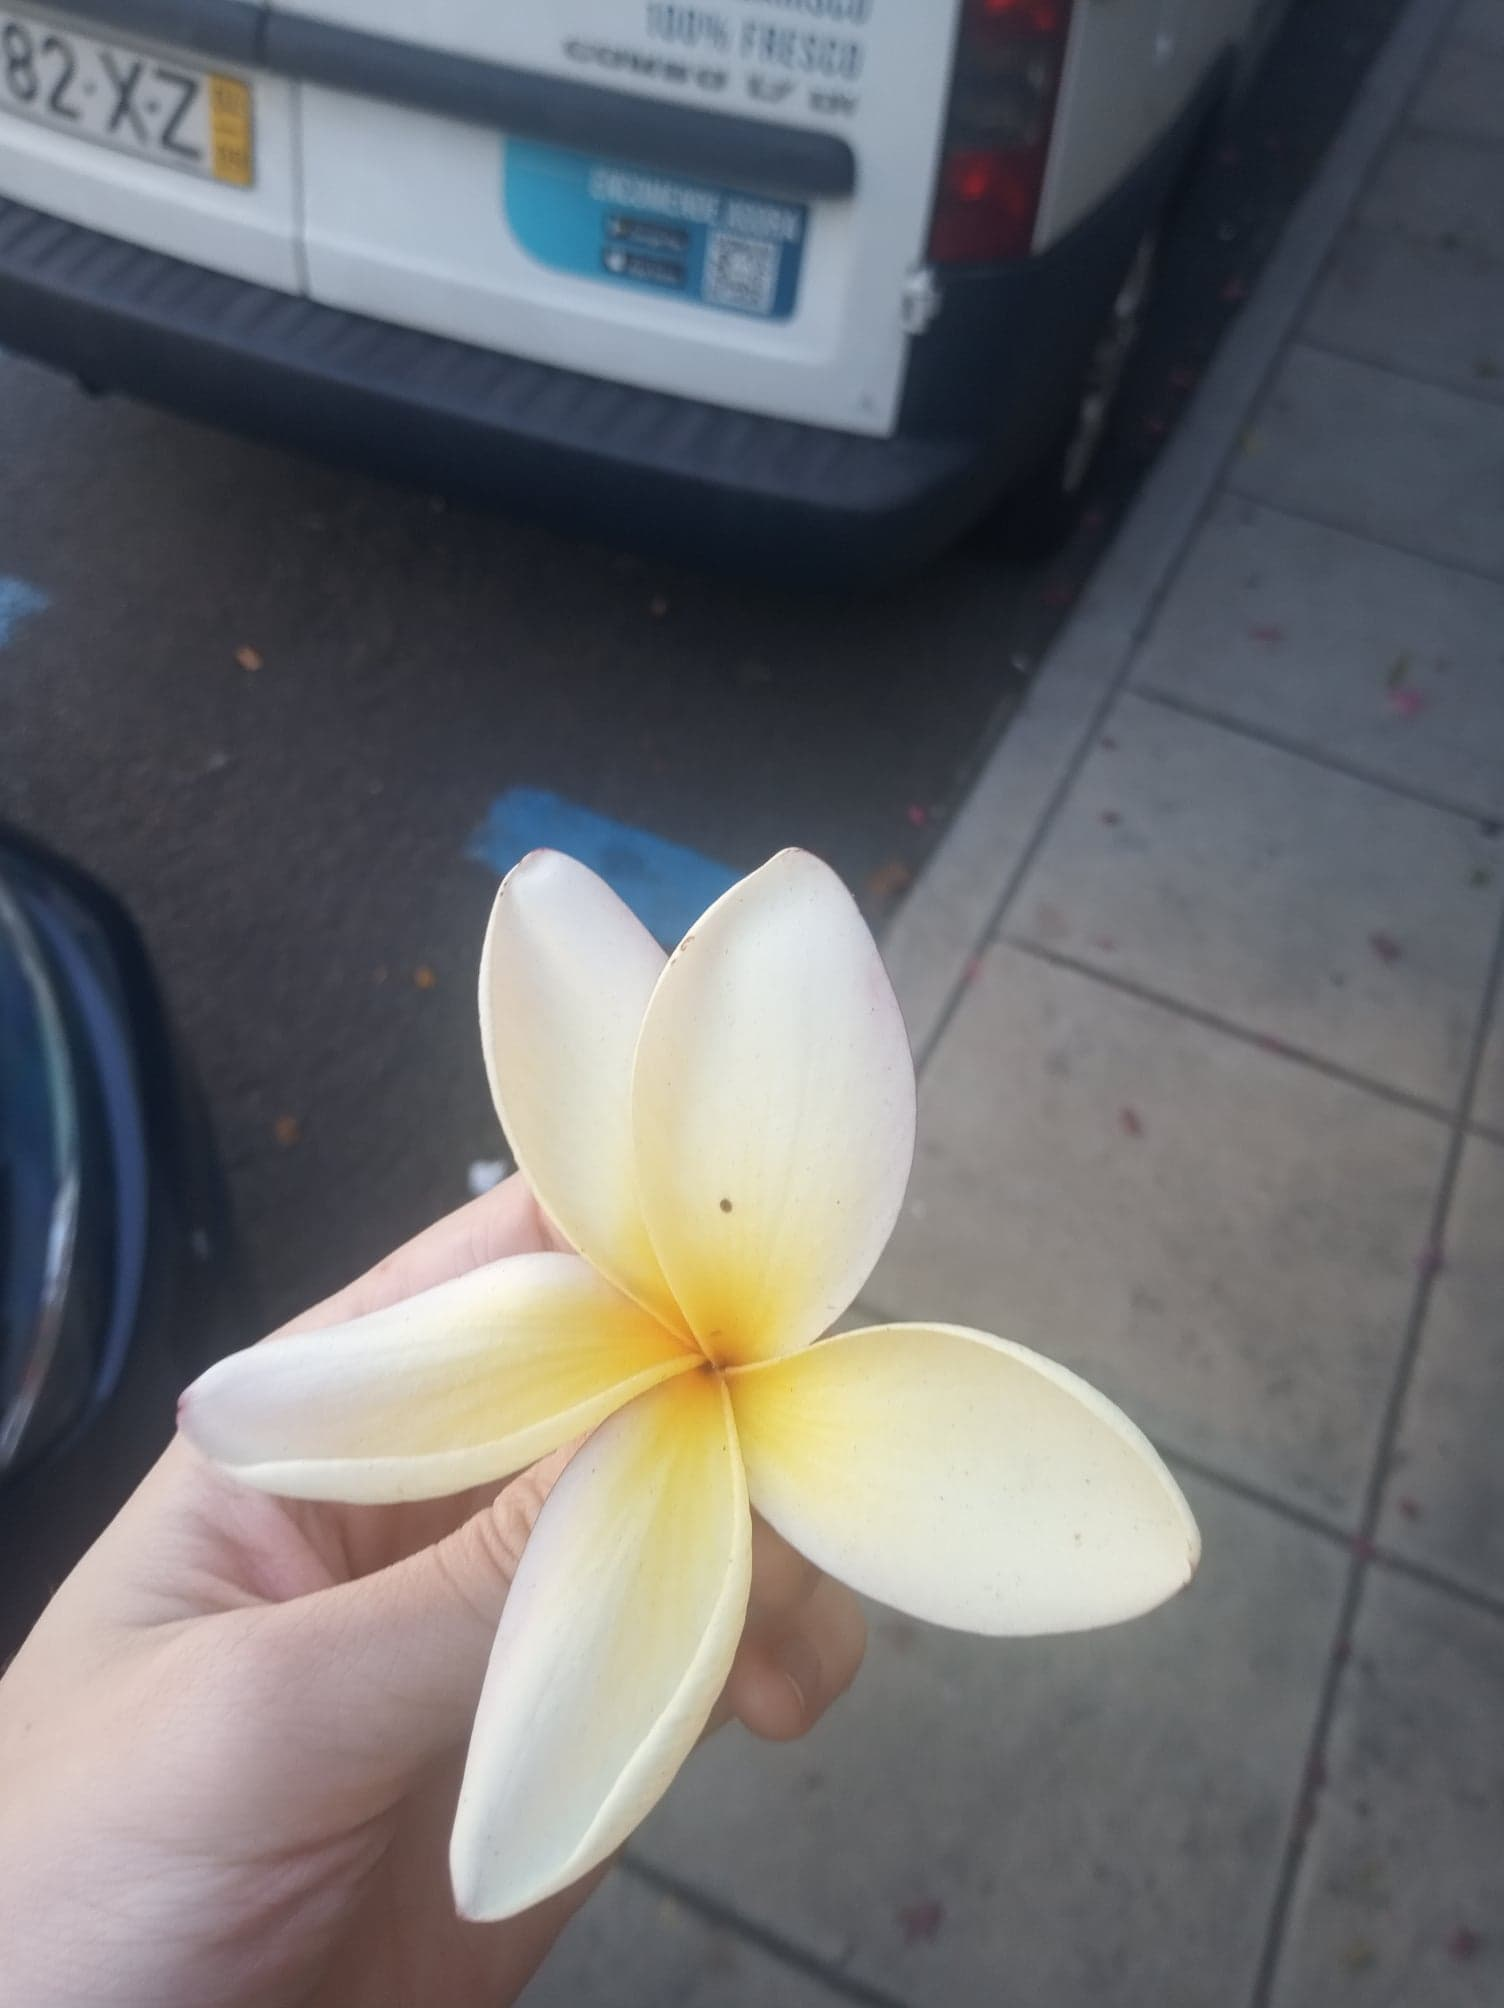

In [33]:
from IPython.display import Image
Image("data/flower.png", width=200)

[Apparently huge differennce in performance between](https://github.com/anthropics/anthropic-cookbook/blob/main/multimodal/best_practices_for_vision.ipynb):
- "How many dogs are in this picture?"
- "You have perfect vision and pay great attention to detail which makes you an expert at counting objects in images. How many dogs are in this picture? Before providing the answer in <answer> tags, think step by step in <thinking> tags and analyze every part of the image."
